# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

# 1. Pre-Processing and Exploratory data analysis

Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.


In [2]:
column_name = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'classes']
data = pd.read_csv('../data/vertebral_column_data/column_2c.dat', names = column_name, sep = ' ')
data.loc[data.classes == 'NO', 'classes'] = 0
data.loc[data.classes == 'AB', 'classes'] = 1
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,classes
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [3]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


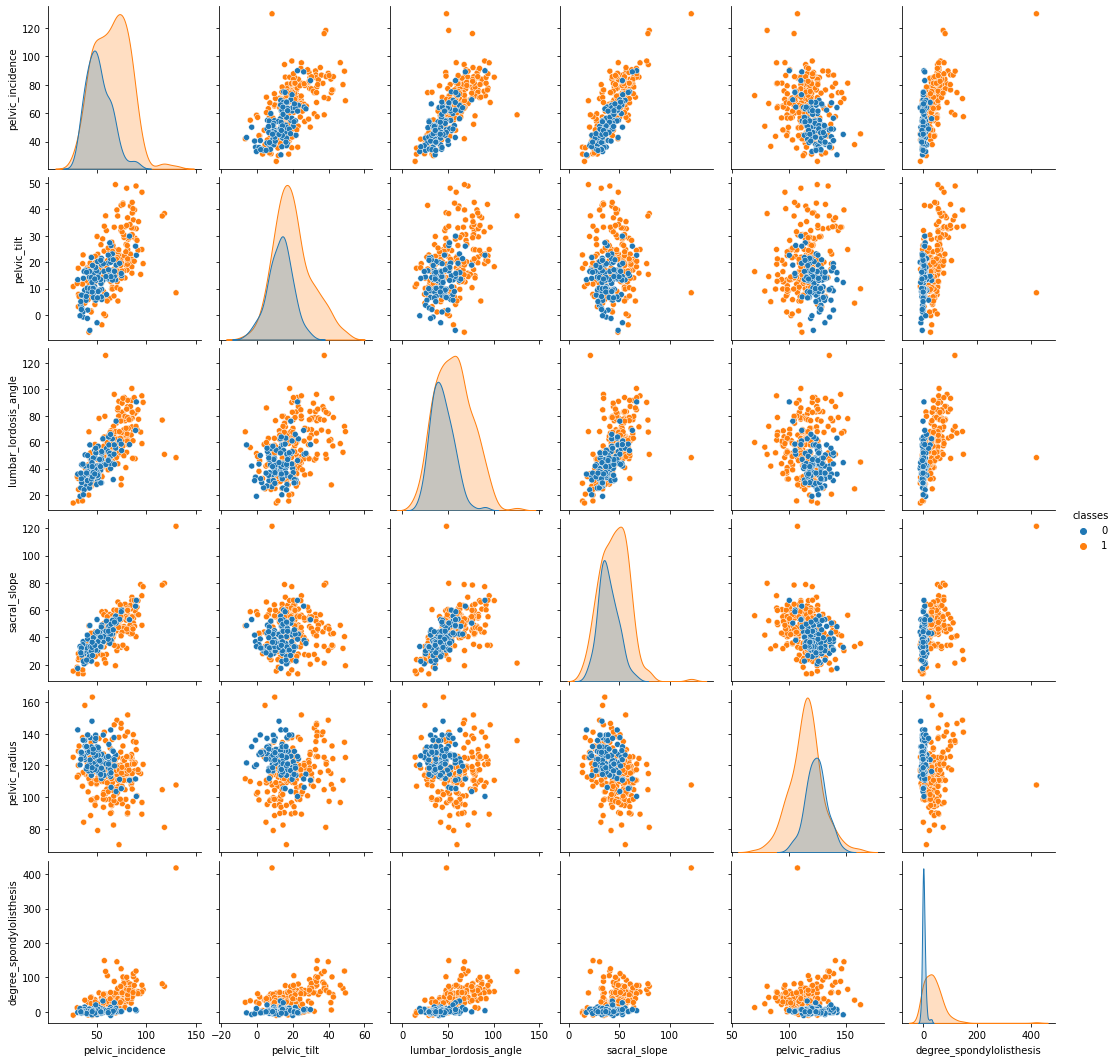

In [4]:
sns.pairplot(data, hue='classes')

Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.

<AxesSubplot:xlabel='classes', ylabel='degree_spondylolisthesis'>

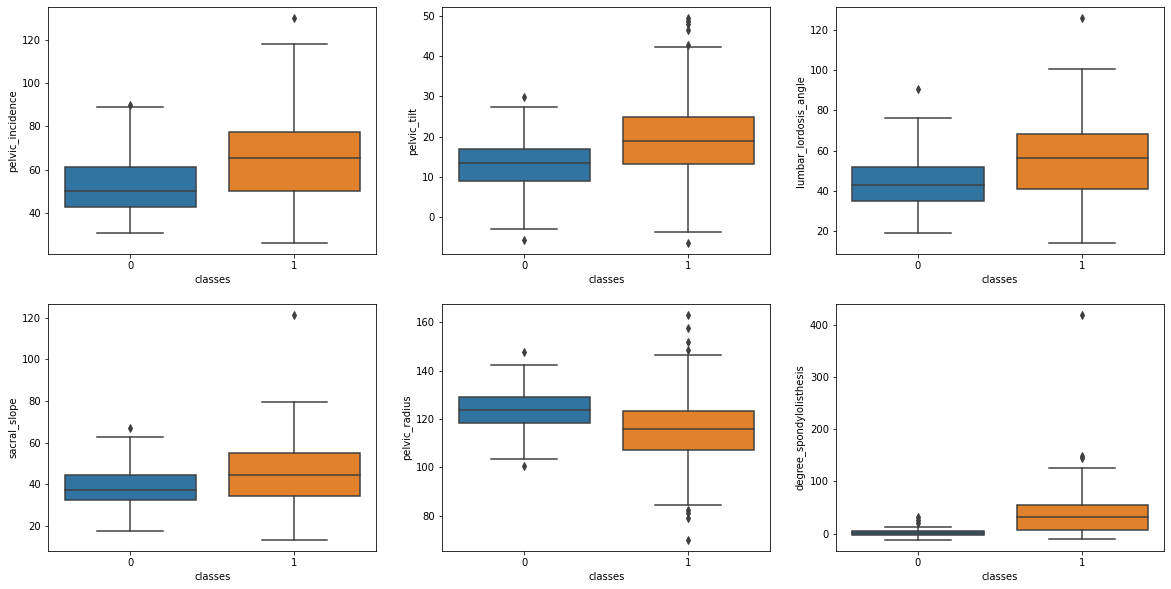

In [5]:
fig, axs = plt.subplots(ncols=3,nrows=2, figsize = (20,10))
sns.boxplot(x='classes', y='pelvic_incidence', data = data, ax=axs[0,0])
sns.boxplot(x='classes', y='pelvic_tilt', data = data, ax=axs[0,1])
sns.boxplot(x='classes', y='lumbar_lordosis_angle', data = data, ax=axs[0,2])
sns.boxplot(x='classes', y='sacral_slope', data = data, ax=axs[1,0])
sns.boxplot(x='classes', y='pelvic_radius', data = data, ax=axs[1,1])
sns.boxplot(x='classes', y='degree_spondylolisthesis', data = data, ax=axs[1,2])

Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
class_0 = data.loc[data.classes == 0]
class_1 = data.loc[data.classes == 1]
train = pd.concat([class_1[:140], class_0[:70]], ignore_index = True)
test = pd.concat([class_1[140:], class_0[70:]], ignore_index = True)
train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,classes
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
205,67.29,16.72,51.00,50.57,137.59,4.96,0
206,51.33,13.63,33.26,37.69,131.31,1.79,0
207,65.76,13.21,44.00,52.55,129.39,-1.98,0
208,40.41,-1.33,30.98,41.74,119.34,-6.17,0


In [7]:
test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,classes
0,69.56,15.40,74.44,54.16,105.07,29.70,1
1,89.50,48.90,72.00,40.60,134.63,118.35,1
2,85.29,18.28,100.74,67.01,110.66,58.88,1
3,60.63,20.60,64.54,40.03,117.23,104.86,1
4,60.04,14.31,58.04,45.73,105.13,30.41,1
...,...,...,...,...,...,...,...
95,47.90,13.62,36.00,34.29,117.45,-4.25,0
96,53.94,20.72,29.22,33.22,114.37,-0.42,0
97,61.45,22.69,46.17,38.75,125.67,-2.71,0
98,45.25,8.69,41.58,36.56,118.55,0.21,0


# 2. Classification using KNN on Vertebral Column Data Set

Write code for k-nearest neighbors with Euclidean metric.

Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. \
Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). \
You are welcome to use smaller increments of k. 
Which k∗ is the most suitable k among those values? \
Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

In [8]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1].astype('int')
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1].astype('int')

def knn(x_train, x_test, y_train, y_test, k_range, p=2, weights = 'uniform'):
    error_rate = []
    for k in k_range:
        classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p, weights= weights)
        classifier.fit(x_train, y_train)
        y_predict = classifier.predict(x_test)
        error_rate.append(np.mean(y_predict != y_test))
        optimal_k = k_range[error_rate.index(min(error_rate))]
        min_error = min(error_rate)
    return error_rate, optimal_k, min_error

test_error_rate = knn(x_train, x_test, y_train, y_test, range(208,0,-3))[0]
train_error_rate = knn(x_train, x_train, y_train, y_train, range(208,0,-3))[0]
euclidean_df = pd.DataFrame({'k':range(208, 0, -3), 'test_error_rate':test_error_rate, 'train_error_rate': train_error_rate})
print(euclidean_df)
print('------------------------------\nEuclidean Distance')
print(f'Minimum test error rate: {min(test_error_rate)}, k = {list(range(208,0,-3))[test_error_rate.index(min(test_error_rate))]}')

      k  test_error_rate  train_error_rate
0   208             0.30          0.333333
1   205             0.30          0.333333
2   202             0.30          0.333333
3   199             0.30          0.333333
4   196             0.30          0.333333
..  ...              ...               ...
65   13             0.12          0.142857
66   10             0.10          0.133333
67    7             0.12          0.142857
68    4             0.06          0.142857
69    1             0.13          0.000000

[70 rows x 3 columns]
------------------------------
Euclidean Distance
Minimum test error rate: 0.06, k = 4


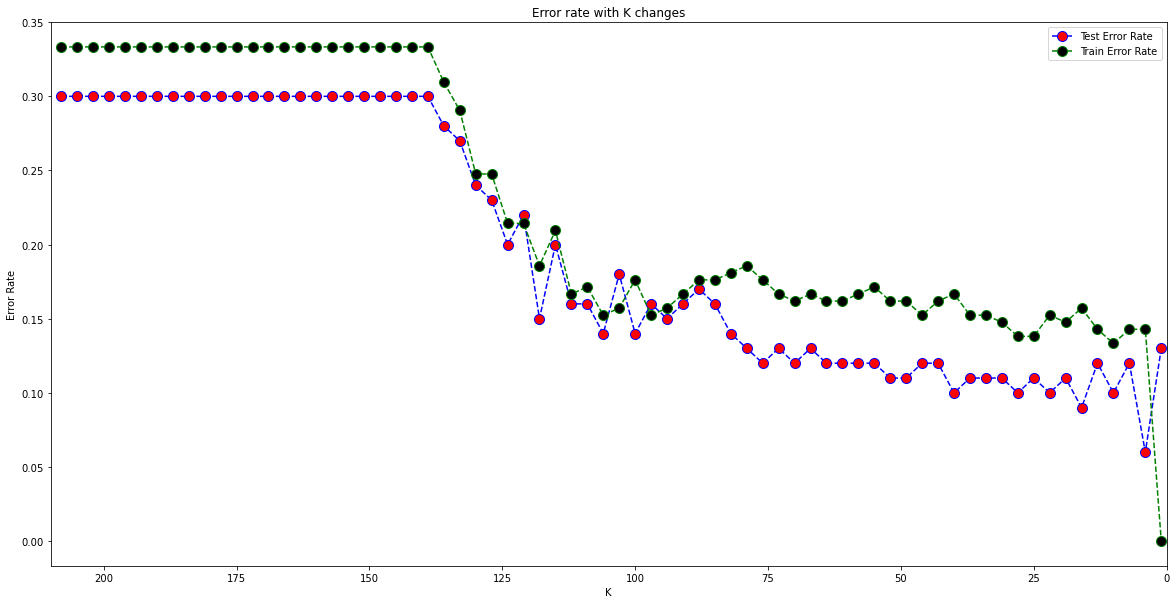

In [9]:
plt.figure(figsize=(20,10))
plt.plot(range(208,0,-3), test_error_rate, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Test Error Rate')
plt.plot(range(208,0,-3), train_error_rate, color='green', linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=10, label='Train Error Rate')
plt.legend()
plt.xlim(210,0)
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error rate with K changes")
plt.show()

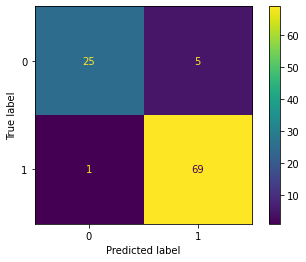

In [10]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
plot_confusion_matrix(classifier, x_test, y_test)

In [11]:
tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
precision = tp/(tp+fp)
recall = tp/(tp+tn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Confusion Matrix:\n {cm}')
print(f'True Postitive Rate: {round(tpr,2)}')
print(f'True Negative Rate: {round(tnr,2)}')
print(f'Precision: {round(precision,2)}')
print(f'F1 Score: {round(f1_score,2)}')

Confusion Matrix:
 [[25  5]
 [ 1 69]]
True Postitive Rate: 0.99
True Negative Rate: 0.83
Precision: 0.93
F1 Score: 0.82


Since the computation time depends on the size of the training set, one may only use a subset of the training set. \
Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. \
Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. \
For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. \
This plot is called a Learning Curve.

In [12]:
size_train_set = range(10,211,10)
rst=[]
for n in size_train_set:
    train = pd.concat([class_1[:n-n//3], class_0[:n//3]], ignore_index = True)
    x_train = train.iloc[:,:-1]
    y_train = train.iloc[:,-1].astype('int')
    knn_rst = knn(x_train, x_test, y_train, y_test, range(1,n+1,5))
    rst.append((n, knn_rst[1], knn_rst[2]))

opt_k_bysize = pd.DataFrame(rst, columns=['N', 'Optimal_K', 'Minimum_Test_Error']).set_index('N')
print(opt_k_bysize)



     Optimal_K  Minimum_Test_Error
N                                 
10           1                0.25
20           6                0.20
30           1                0.22
40          11                0.25
50          26                0.30
60          21                0.29
70          26                0.29
80          31                0.29
90          41                0.29
100          6                0.25
110          6                0.22
120         16                0.17
130         16                0.16
140         16                0.15
150         16                0.13
160          6                0.13
170          6                0.13
180          6                0.10
190          6                0.09
200          6                0.09
210          6                0.08


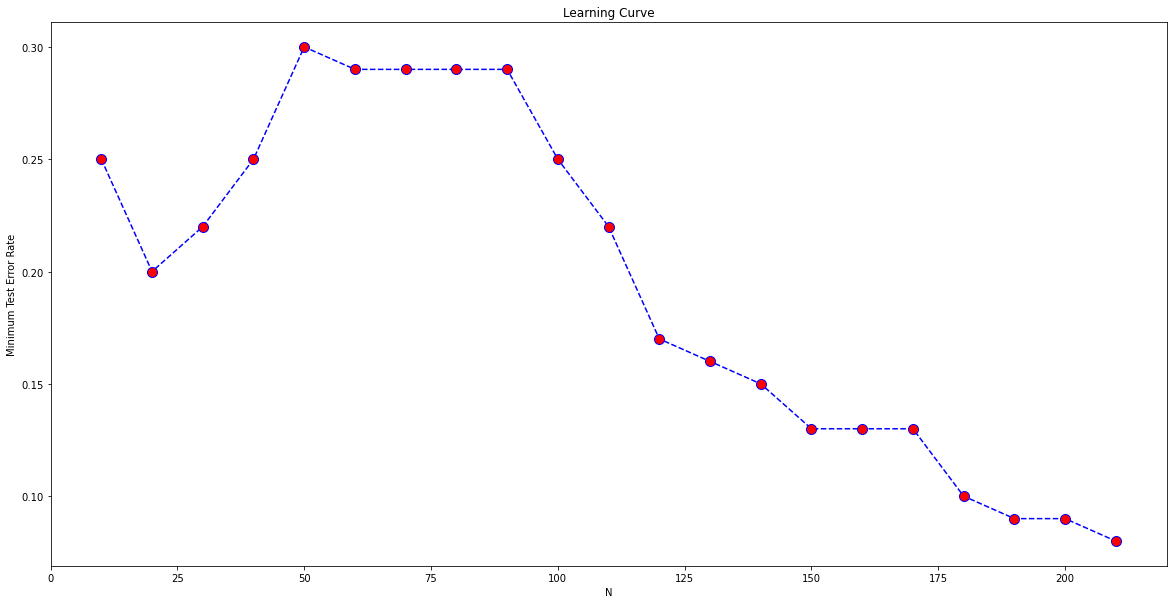

In [13]:
plt.figure(figsize=(20,10))
plt.plot(opt_k_bysize.index, opt_k_bysize.Minimum_Test_Error, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xlim(0,220)
plt.xlabel("N")
plt.ylabel("Minimum Test Error Rate")
plt.title("Learning Curve")
plt.show()

# 3. Replace the Euclidean metric

## Minkowski Distance
which becomes Manhattan Distance with p = 1

In [14]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1].astype('int')
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1].astype('int')

manhattan = knn(x_train, x_test, y_train, y_test, range(1,197,5), p=1)
manhattan_train_error = knn(x_train, x_train, y_train, y_train, range(1,197,5), p=1)[0]
manhattan_df = pd.DataFrame({'K': range(1,197,5), 'test_error_rate':manhattan[0], 'train_error_rate': manhattan_train_error})
print(manhattan_df)
print('----------------------------')
print(f'Manhattan distance \nOptimal K: {manhattan[1]} \nMinimum Test Error Rate: {manhattan[2]}')


      K  test_error_rate  train_error_rate
0     1             0.12          0.000000
1     6             0.11          0.138095
2    11             0.11          0.142857
3    16             0.12          0.133333
4    21             0.12          0.147619
5    26             0.11          0.166667
6    31             0.12          0.166667
7    36             0.13          0.161905
8    41             0.13          0.166667
9    46             0.13          0.171429
10   51             0.14          0.171429
11   56             0.13          0.185714
12   61             0.15          0.176190
13   66             0.15          0.180952
14   71             0.14          0.176190
15   76             0.14          0.180952
16   81             0.16          0.166667
17   86             0.15          0.152381
18   91             0.20          0.180952
19   96             0.20          0.176190
20  101             0.22          0.200000
21  106             0.21          0.204762
22  111    

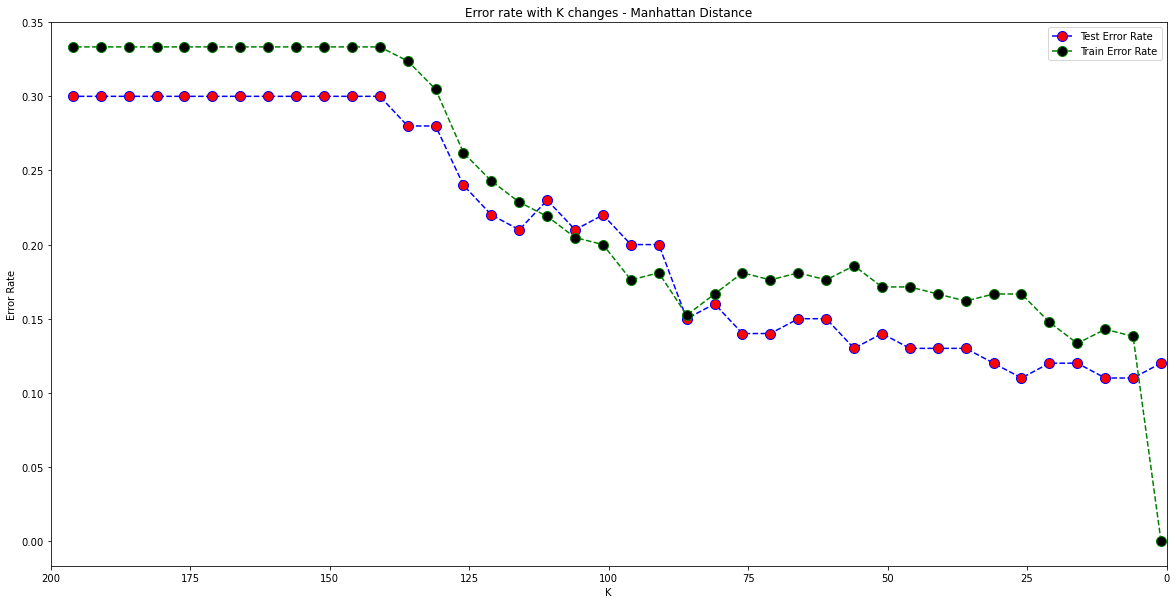

In [15]:
plt.figure(figsize=(20,10))
plt.plot(manhattan_df.K, manhattan_df.test_error_rate, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Test Error Rate')
plt.plot(manhattan_df.K, manhattan_df.train_error_rate, color='green', linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=10, label='Train Error Rate')
plt.xlim(200,0)
plt.legend()
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error rate with K changes - Manhattan Distance")
plt.show()

with log10(p) ∈ {0.1,0.2,0.3,...,1}. \
In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. \
What is the best log10(p)?


In [16]:
test_error_rate=[]
train_error_rate=[]
p_list=[10**(a/10) for a in range(1,11,1)]
for p in p_list:
    classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=p)
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    y_predict_train = classifier.predict(x_train)
    test_error_rate.append(np.mean(y_predict != y_test))
    train_error_rate.append(np.mean(y_predict_train != y_train))
minkowski_df = pd.DataFrame({'p_value': p_list, 'test_error_rate':test_error_rate, 'train_error_rate':train_error_rate})
print(minkowski_df)
print('-----------------------------------------')
print(f'Minkowski distance \nBest logP: {np.log10(minkowski_df.p_value[minkowski_df.test_error_rate.idxmin()])}\nMinimum Test Error Rate: {minkowski_df.test_error_rate.min()}')

     p_value  test_error_rate  train_error_rate
0   1.258925             0.09          0.138095
1   1.584893             0.09          0.147619
2   1.995262             0.08          0.152381
3   2.511886             0.08          0.152381
4   3.162278             0.08          0.147619
5   3.981072             0.06          0.152381
6   5.011872             0.07          0.152381
7   6.309573             0.08          0.147619
8   7.943282             0.09          0.147619
9  10.000000             0.09          0.133333
-----------------------------------------
Minkowski distance 
Best logP: 0.6
Minimum Test Error Rate: 0.06


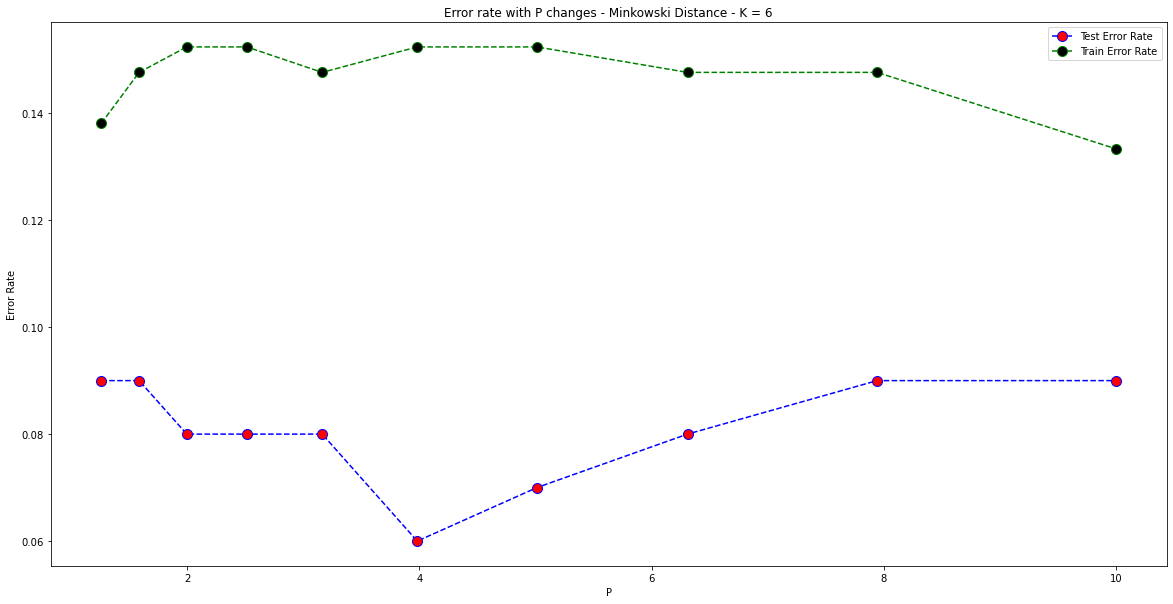

In [17]:
plt.figure(figsize=(20,10))
plt.plot(minkowski_df.p_value, minkowski_df.test_error_rate, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Test Error Rate')
plt.plot(minkowski_df.p_value, minkowski_df.train_error_rate, color='green', linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=10, label='Train Error Rate')
plt.legend()
plt.xlabel("P")
plt.ylabel("Error Rate")
plt.title("Error rate with P changes - Minkowski Distance - K = 6")
plt.show()

which becomes Chebyshev Distance with p → ∞

In [18]:
chebyshev = knn(x_train, x_test, y_train, y_test, range(1,197,5), p=float('inf'))
chebyshev_train_error = knn(x_train, x_train, y_train, y_train, range(1,197,5), p=float('inf'))[0]
chebyshev_df = pd.DataFrame({'K': range(1,197,5), 'test_error_rate':chebyshev[0], 'train_error_rate': chebyshev_train_error})
print(chebyshev_df)
print('-----------------------------------------')
print(f'Chebyshev distance \nOptimal K: {chebyshev[1]} \nMinimum Test Error Rate: {chebyshev[2]}')

      K  test_error_rate  train_error_rate
0     1             0.13          0.000000
1     6             0.09          0.152381
2    11             0.12          0.152381
3    16             0.08          0.147619
4    21             0.11          0.133333
5    26             0.12          0.157143
6    31             0.12          0.142857
7    36             0.10          0.152381
8    41             0.13          0.142857
9    46             0.12          0.161905
10   51             0.12          0.166667
11   56             0.12          0.166667
12   61             0.14          0.171429
13   66             0.13          0.161905
14   71             0.14          0.180952
15   76             0.11          0.176190
16   81             0.14          0.171429
17   86             0.12          0.171429
18   91             0.15          0.157143
19   96             0.14          0.166667
20  101             0.19          0.171429
21  106             0.18          0.171429
22  111    

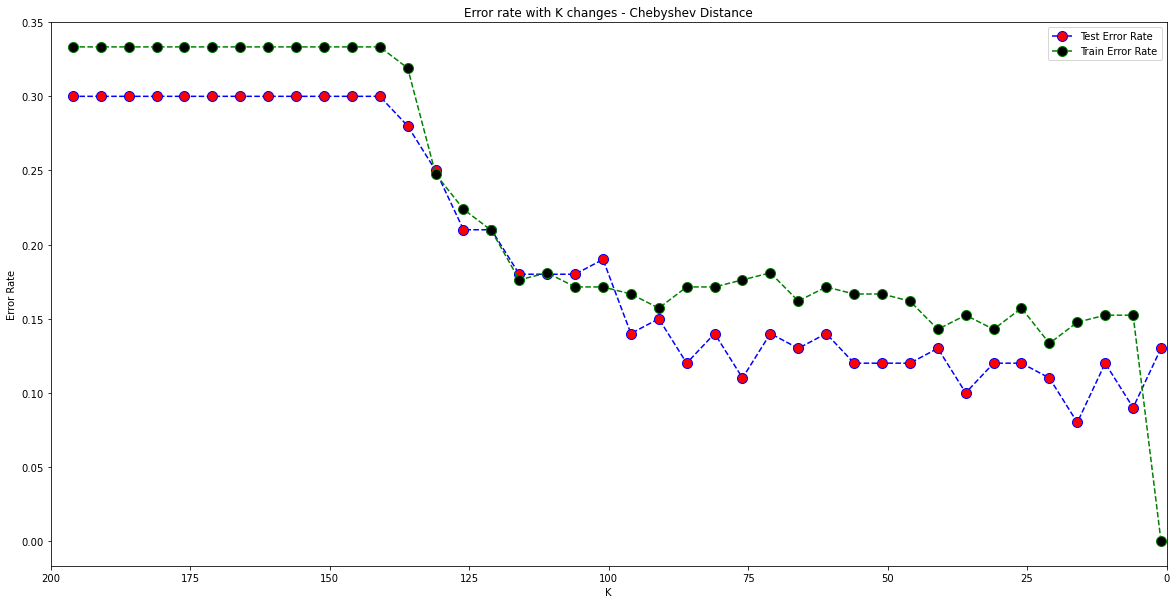

In [19]:
plt.figure(figsize=(20,10))
plt.plot(chebyshev_df.K, chebyshev_df.test_error_rate, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Test Error Rate')
plt.plot(chebyshev_df.K, chebyshev_df.train_error_rate, color='green', linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=10, label='Train Error Rate')
plt.xlim(200,0)
plt.legend()
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error rate with K changes - Chebyshev Distance")
plt.show()

## Mahalanobis Distance

In [20]:
test_error_rate=[]
train_error_rate=[]
for k in range(1,197,5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': np.eye(6)})
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    y_predict_train = classifier.predict(x_train)
    test_error_rate.append(np.mean(y_predict != y_test))
    train_error_rate.append(np.mean(y_predict_train != y_train))

mahalanobis_df = pd.DataFrame({'k':range(1,197,5), 'test_error_rate':test_error_rate, 'train_error_rate':train_error_rate})
print(mahalanobis_df)
print('-----------------------------------------')
print(f'Mahalanobis distance \nOptimal K:{mahalanobis_df.k[mahalanobis_df.test_error_rate.idxmin()]} \nMinimum Test Error Rate: {mahalanobis_df.test_error_rate.min()}')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklea

      k  test_error_rate  train_error_rate
0     1             0.13          0.000000
1     6             0.08          0.147619
2    11             0.12          0.147619
3    16             0.09          0.157143
4    21             0.10          0.138095
5    26             0.11          0.142857
6    31             0.11          0.147619
7    36             0.11          0.161905
8    41             0.11          0.161905
9    46             0.12          0.152381
10   51             0.11          0.157143
11   56             0.12          0.171429
12   61             0.12          0.161905
13   66             0.13          0.166667
14   71             0.13          0.166667
15   76             0.12          0.176190
16   81             0.13          0.166667
17   86             0.16          0.161905
18   91             0.16          0.166667
19   96             0.15          0.161905
20  101             0.17          0.185714
21  106             0.29          0.300000
22  111    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(


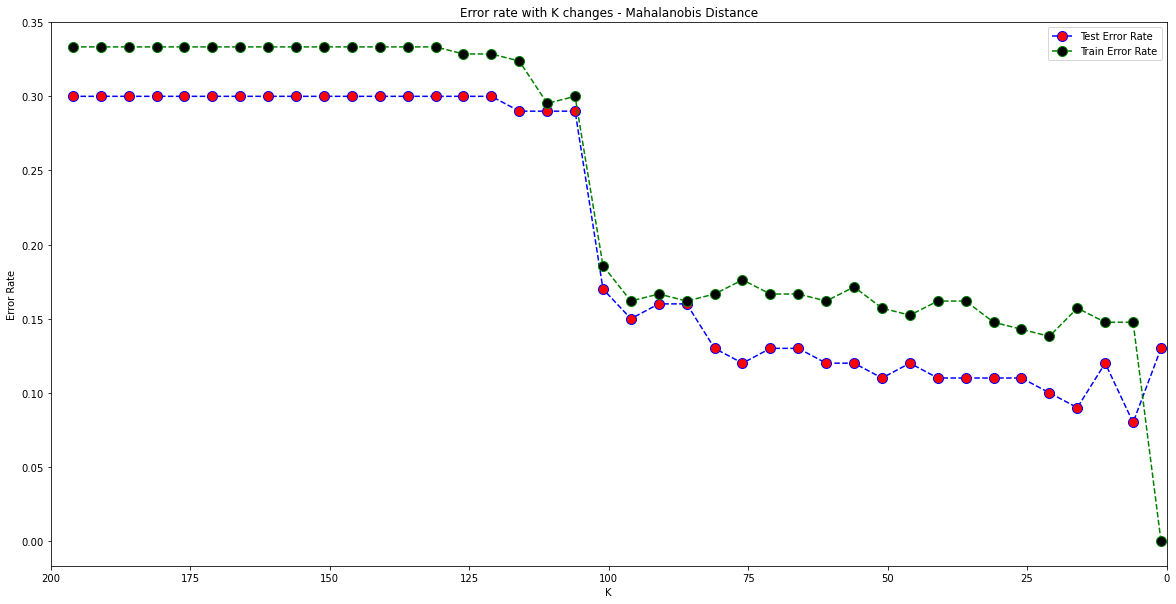

In [21]:
plt.figure(figsize=(20,10))
plt.plot(mahalanobis_df.k, mahalanobis_df.test_error_rate, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Test Error Rate')
plt.plot(mahalanobis_df.k, mahalanobis_df.train_error_rate, color='green', linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=10, label='Train Error Rate')
plt.xlim(200,0)
plt.legend()
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error rate with K changes - Mahalanobis Distance")
plt.show()

# 4. Weighted Decision

The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. \
In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. \
Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [22]:
euclidean_error = knn(x_train, x_test, y_train, y_test, range(1,197,5), p=2, weights='distance')
manhattan_error = knn(x_train, x_test, y_train, y_test, range(1,197,5), p=1, weights='distance')
chebyshev_error = knn(x_train, x_test, y_train, y_test, range(1,197,5), p=9999999999, weights='distance')

weighted_decision = pd.DataFrame({'k': range(1,197,5), 'Euclidean': euclidean_error[0], 'Manhattan': manhattan_error[0], 
                                'Chebyshev': chebyshev_error[0]})
print(weighted_decision)

      k  Euclidean  Manhattan  Chebyshev
0     1       0.13       0.12        0.7
1     6       0.10       0.11        0.7
2    11       0.12       0.11        0.7
3    16       0.11       0.12        0.7
4    21       0.11       0.11        0.7
5    26       0.11       0.10        0.7
6    31       0.11       0.11        0.7
7    36       0.11       0.11        0.7
8    41       0.11       0.11        0.7
9    46       0.11       0.11        0.7
10   51       0.11       0.12        0.7
11   56       0.11       0.12        0.7
12   61       0.11       0.13        0.7
13   66       0.11       0.13        0.7
14   71       0.11       0.11        0.7
15   76       0.12       0.12        0.7
16   81       0.13       0.14        0.7
17   86       0.13       0.14        0.7
18   91       0.14       0.13        0.7
19   96       0.14       0.13        0.7
20  101       0.12       0.15        0.7
21  106       0.14       0.15        0.7
22  111       0.14       0.15        0.7
23  116       0.

In [23]:
print(f'Manhattan Distance \nOptimal K: {manhattan_error[1]} \nMinimum Test Error Rate: {manhattan_error[2]} \n--------------------')
print(f'Euclidean Distance \nOptimal K: {euclidean_error[1]} \nMinimum Test Error Rate: {euclidean_error[2]} \n--------------------')
print(f'Chebyshev Distance \nOptimal K: {chebyshev_error[1]} \nMinimum Test Error Rate: {chebyshev_error[2]} \n--------------------')

Manhattan Distance 
Optimal K: 26 
Minimum Test Error Rate: 0.1 
--------------------
Euclidean Distance 
Optimal K: 6 
Minimum Test Error Rate: 0.1 
--------------------
Chebyshev Distance 
Optimal K: 1 
Minimum Test Error Rate: 0.7 
--------------------


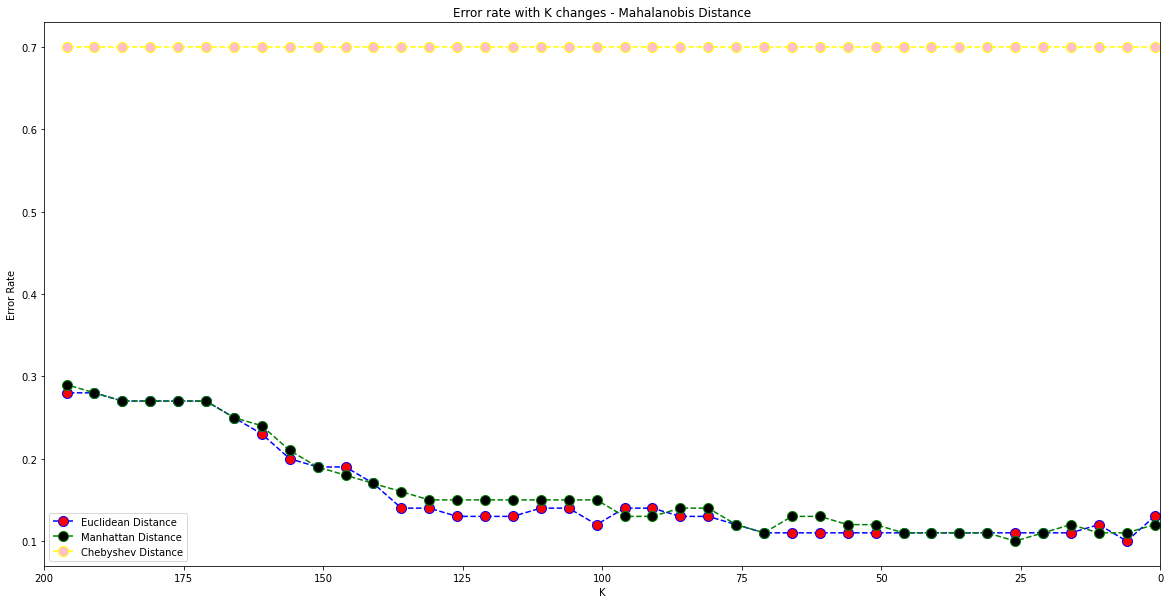

In [24]:
plt.figure(figsize=(20,10))
plt.plot(weighted_decision.k, weighted_decision.Euclidean, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Euclidean Distance')
plt.plot(weighted_decision.k, weighted_decision.Manhattan, color='green', linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=10, label='Manhattan Distance')
plt.plot(weighted_decision.k, weighted_decision.Chebyshev, color='yellow', linestyle='dashed', 
         marker='o',markerfacecolor='pink', markersize=10, label='Chebyshev Distance')
plt.xlim(200,0)
plt.legend()
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error rate with K changes - Mahalanobis Distance")
plt.show()

# 5. What is the lowest training error rate you achieved?

For the Training Error, Most of the algorithms get a zero training error rate when we use k=1.\
It means the most nearest neighbor is very similar each other.\
(If you pick the one nearest neighbor with any kind of distance, it is most likley to be a same label.)